In [36]:
# Importing Libararies

import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from datetime import datetime

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Import Bike Dataset

In [37]:
bike_data_set=pd.read_csv("day.csv")
bike_data_set.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Pre-Processing 
1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
2. weathersit:
        
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [40]:
#changing cnt (target Variable position to first)
bike_data_set.columns.values
new_positions=['cnt','instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']
bike_data_set=bike_data_set[new_positions]

In [41]:
#convering season to Categorical variable
bike_data_set['season']=bike_data_set['season'].apply(lambda x: 'spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter')

#convering weathersit to Categorical variable

bike_data_set['weathersit']=bike_data_set['weathersit'].apply(lambda x: 'Clear' if x==1 else 'Mist' if x==2 else 'Light Snow' if x==3 else 'Heavy Rain')


In [ ]:
bike_data_set.describe()

In [25]:
bike_data_set.info()
#CNT is our target variable hence we can do linear regression. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


In [24]:
bike_data_set.isnull().sum()
#no null in the data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Lets Visualize Data

<Figure size 1600x1000 with 0 Axes>

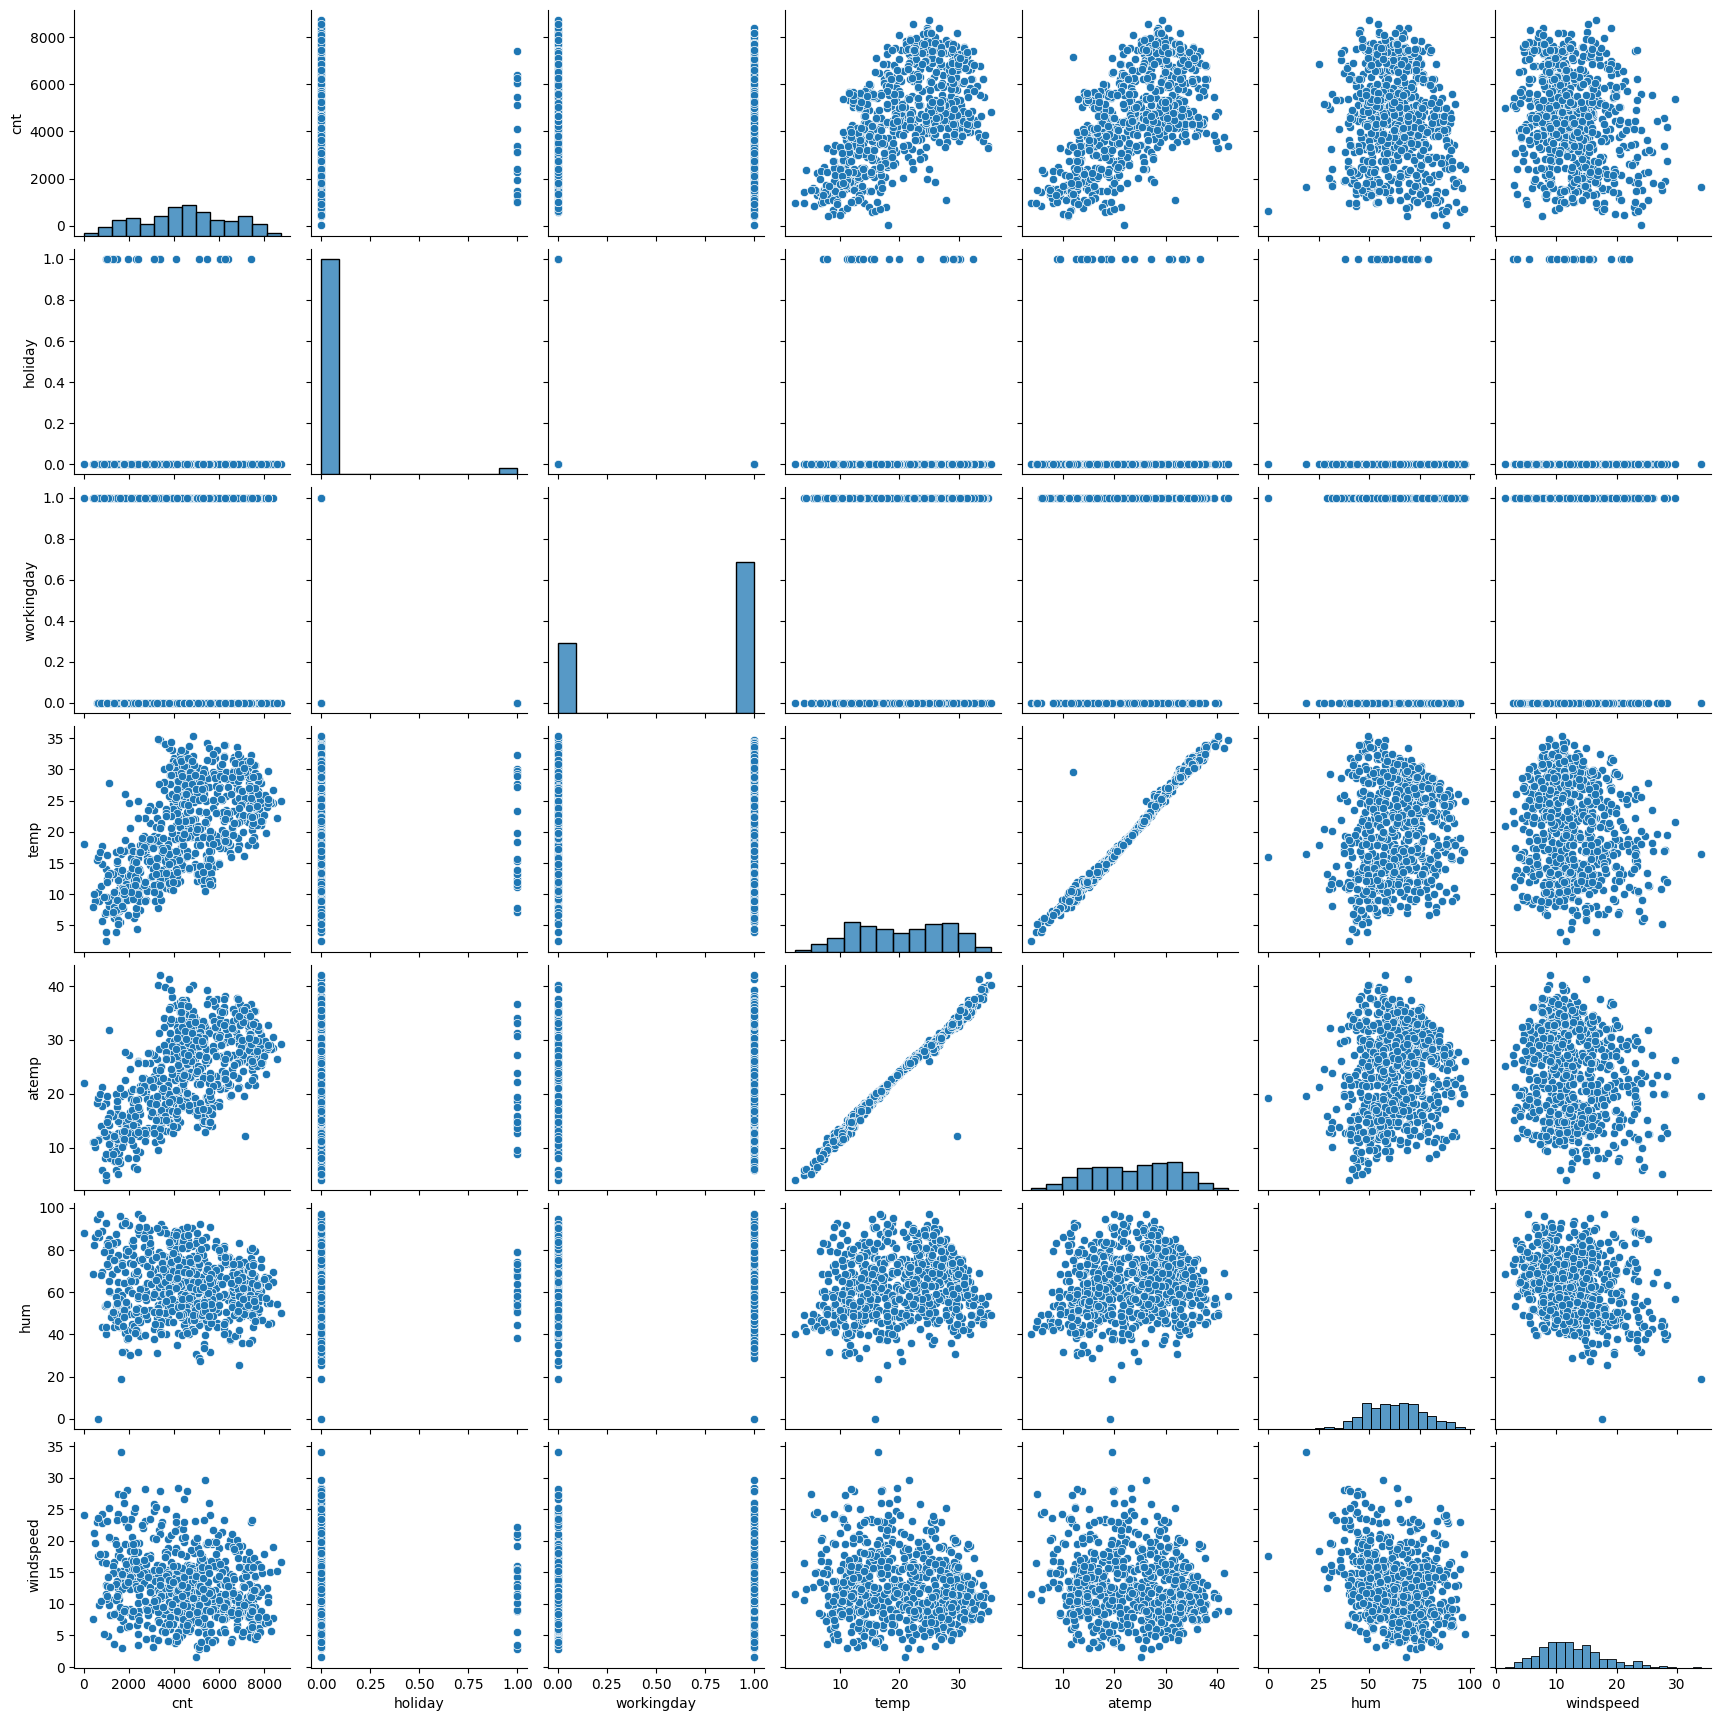

In [47]:
#lets create a pair plot for all numerical variables 
plt.figure(figsize=(16,10))
sns.pairplot(bike_data_set[['cnt','holiday','workingday','temp','atemp','hum','windspeed']])
plt.show()

from above charts , it seems like temp windspeed, atemp are strong predictor. and have some relationship 
we can go ahead with linear regression as there are few variables that are corelated with CNT


<Axes: xlabel='season', ylabel='cnt'>

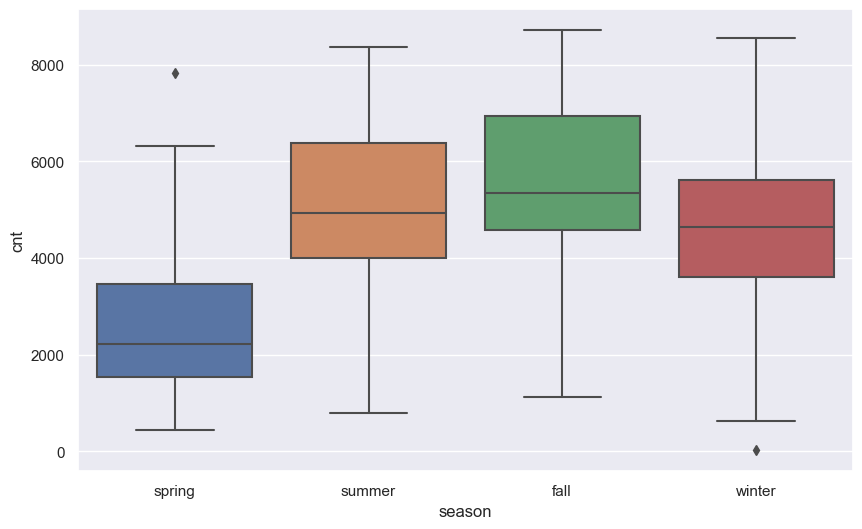

In [58]:
# Lets visualize Categorical variables, Create some box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='season',y='cnt',data=bike_data_set)


<Axes: xlabel='weathersit', ylabel='cnt'>

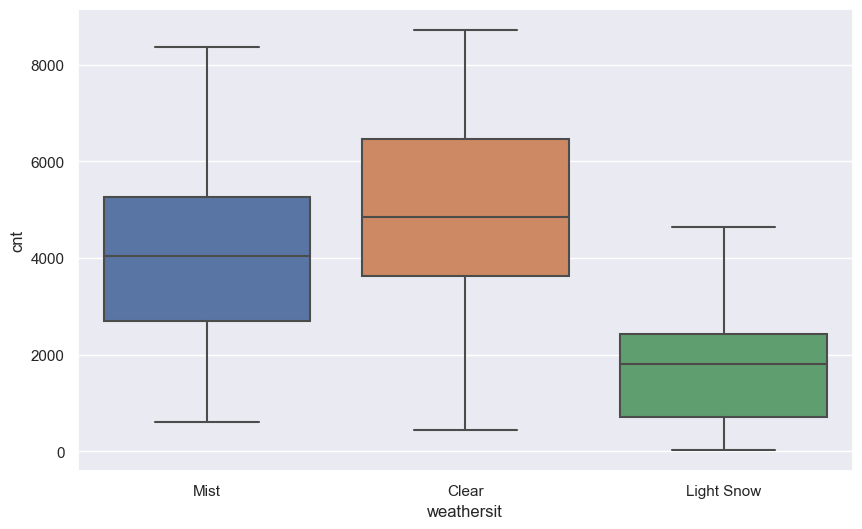

In [59]:
# Lets visualize Categorical variables, Create some box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit',y='cnt',data=bike_data_set)


## Preparing the Data

    - Encoding 
        Converting Binary Variables to 1/0
        Other Categorical Variables to Dummy Variables 
    - Remove unwanted data    

In [48]:
#removing redudant variables
weathersit_frame=pd.get_dummies(bike_data_set['weathersit'],dtype=int,drop_first=True)

#concating dummy frame with main frame
bike_data_set=pd.concat([bike_data_set,weathersit_frame],axis=1)

#drop weathersit variable 
bike_data_set=bike_data_set.drop('weathersit',axis=1)



In [49]:
#removing redudant variables
bike_data_set['season'].value_counts()
season_frame=pd.get_dummies(bike_data_set['season'],dtype=int,drop_first=True)
#concating dummy frame with main frame
bike_data_set=pd.concat([bike_data_set,season_frame],axis=1)

#drop weathersit variable 
bike_data_set=bike_data_set.drop('season',axis=1)


In [55]:
#drop dteday and instant,

#casual and registerd. it will not be parameter

bike_data_set=bike_data_set.drop('dteday',axis=1)
bike_data_set=bike_data_set.drop('instant',axis=1)
bike_data_set=bike_data_set.drop('casual',axis=1)
bike_data_set=bike_data_set.drop('registerd',axis=1)

KeyError: "['dteday'] not found in axis"

In [51]:
bike_data_set.head()

,cnt,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,Light Snow,Mist,spring,summer,winter
0,985,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,0,1,1,0,0
1,801,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,0,1,1,0,0
2,1349,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,0,0,1,0,0
3,1562,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,0,0,1,0,0
4,1600,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,0,0,1,0,0


## Splitting the data into Train and Test

In [52]:
bike_train,bike_test=train_test_split(bike_data_set,train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 17)
(220, 17)


In [53]:
#Rescaling the features
scaler=MinMaxScaler()
list_of_columns_scaling=['weekday','mnth','temp','atemp','hum','windspeed','casual','registered','cnt']
bike_train[list_of_columns_scaling]=scaler.fit_transform(bike_train[list_of_columns_scaling])
bike_train.describe()

,cnt,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,Light Snow,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.224421,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.518638,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684710,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the Model

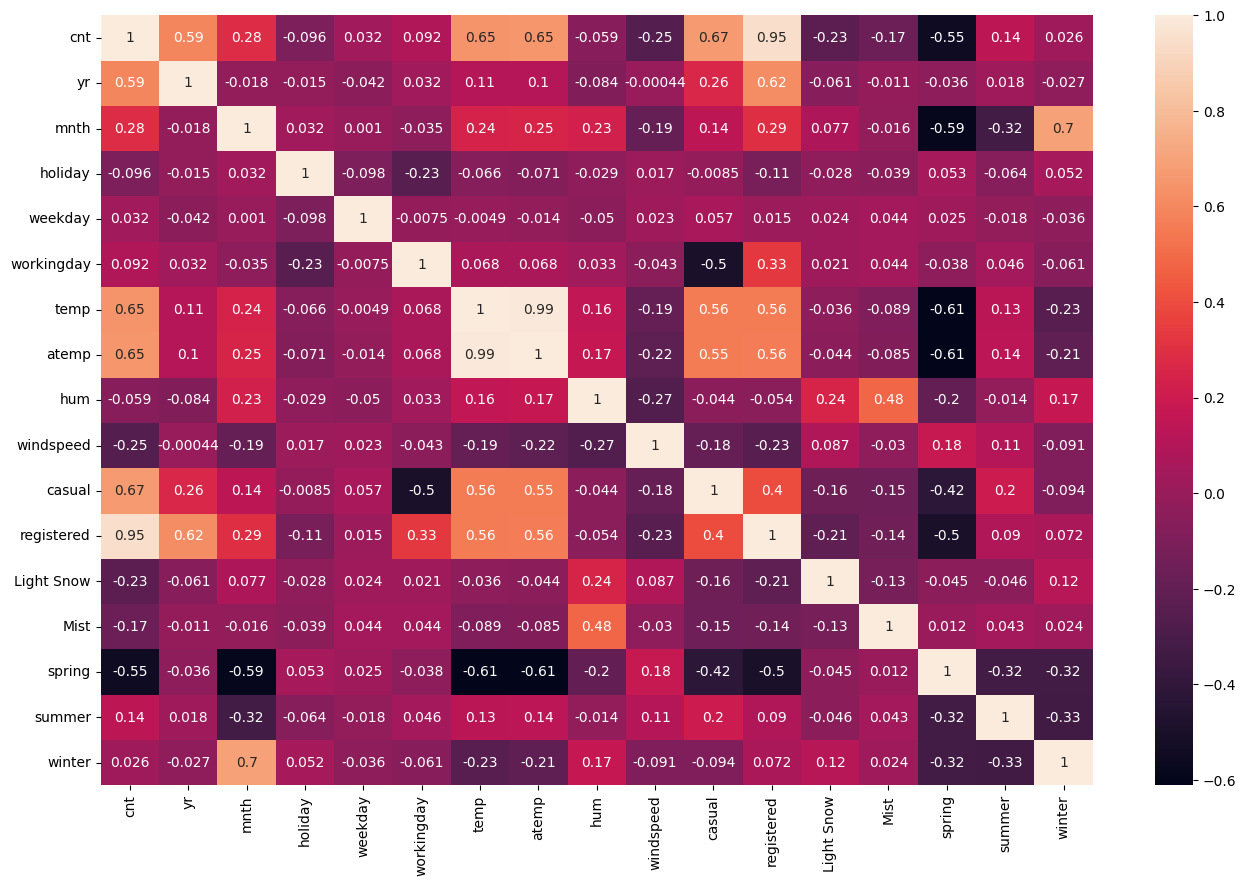

In [54]:
plt.figure(figsize=(16,10))
sns.heatmap(bike_train.corr(),annot=True)
plt.show()